In [4]:
!pip install lionagi --quiet

In [5]:
!pip install open-interpreter --quiet

In [3]:
from lionagi.core.message import System, Instruction
from lionagi.core.executor.graph_executor import GraphExecutor
from lionagi.core.engine.instruction_map_engine import InstructionMapEngine
from lionagi.core.agent.base_agent import BaseAgent

In [16]:
sys_dev = System(system="You are a chief developer. You are developing a system that uses boto3 to create ECS instances, create VPCs, create Lambda functions from Dockerised containers, upload files to s3, create s3 buckets, and create a cognito groups. Gather the necessary information from the user like AWS_ACCESS_KEY AND AWS_SECRET_KEY as config file and store it in a secure way in a seprate endpoint and use that file to do the mentioned capabilites")
instruct1 = Instruction("Create a step by step approach to develop the system.")
instruct2 = Instruction(instruction="What would be the different endpoints needed assuming the system to be developed all inputs should be validated using pydantic and the API structure should be desinged using FastAPI")
instruction3 = Instruction(instruction="Create test cases")
instruction4 = Instruction(instruction='Create a Bash script to automate the setup of the FastAPI application including the python scripts as well and the file directory management. the file should have requirements.txt, main.py, models.py in the bash script')

In [17]:
graph_dev = GraphExecutor()
graph_dev.add_node(sys_dev)
graph_dev.add_node(instruct1)
graph_dev.add_node(instruct2)
graph_dev.add_node(instruction3)
graph_dev.add_node(instruction4)
graph_dev.add_edge(sys_dev, instruct1)
graph_dev.add_edge(instruct1, instruct2)
graph_dev.add_edge(instruct2, instruction3)
graph_dev.add_edge(instruction3, instruction4)

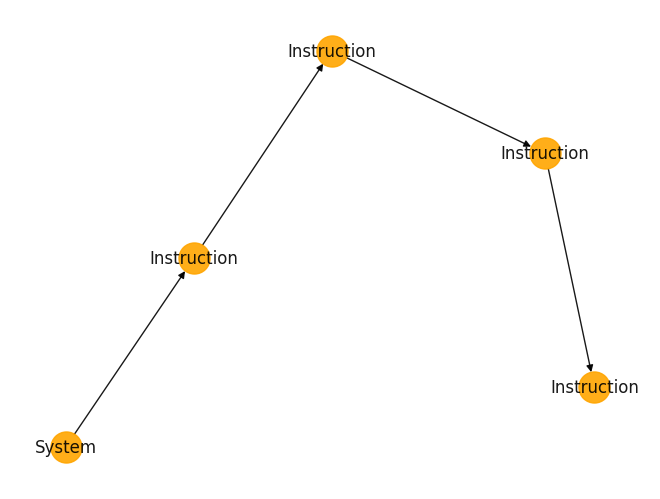

In [18]:
graph_dev.display()

In [19]:
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output


executable_dev = InstructionMapEngine()

In [20]:
coder = BaseAgent(
    structure=graph_dev,
    executable=executable_dev,
    output_parser=output_parser,
)

In [22]:
result = await coder.execute()

------------------Welcome: system--------------------


system: You are a chief developer. You are developing a system that uses boto3 to create ECS instances, create VPCs, create Lambda functions from Dockerised containers, upload files to s3, create s3 buckets, and create a cognito groups. Gather the necessary information from the user like AWS_ACCESS_KEY AND AWS_SECRET_KEY as config file and store it in a secure way in a seprate endpoint and use that file to do the mentioned capabilites

user: Create a step by step approach to develop the system.

assistant 6ad36aed45eb85c51ccd53766810fa06: Developing a system that uses boto3 to manage AWS resources involves several steps. Below is a step-by-step approach to achieve this:

### Step 1: Gather Requirements and Plan
1. **Identify the AWS services** you need to interact with: ECS, VPC, Lambda, S3, and Cognito.
2. **Define the operations** you need to perform: create ECS instances, create VPCs, create Lambda functions from Dockerized containers, upload files to S3, create S3 buckets, and create Cognito groups.
3. **Security Considerations**: Ensure that AWS credentials are stored securely.

### Step 2: Set Up the Development Environment
1. **Install Python**: Ensure Python is installed on your system.
2. **Install boto3**: Use pip to install boto3.
   ```bash
   pip install boto3
   ```
3. **Set Up a Virtual Environment**: (Optional but recommended)
   ```bash
   python -m venv myenv
   source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`
   ```

### Step 3: Securely Store AWS Credentials
1. **Create a Configuration Endpoint**: Develop an endpoint to securely gather and store AWS credentials.
   - Use encryption to store the credentials securely.
   - Example using Flask for the endpoint:
     ```python
     from flask import Flask, request
     from cryptography.fernet import Fernet
     import json

     app = Flask(__name__)
     key = Fernet.generate_key()
     cipher_suite = Fernet(key)

     @app.route('/store_credentials', methods=['POST'])
     def store_credentials():
         data = request.json
         aws_access_key = data['AWS_ACCESS_KEY']
         aws_secret_key = data['AWS_SECRET_KEY']
         encrypted_access_key = cipher_suite.encrypt(aws_access_key.encode())
         encrypted_secret_key = cipher_suite.encrypt(aws_secret_key.encode())
         with open('aws_credentials.json', 'w') as f:
             json.dump({
                 'AWS_ACCESS_KEY': encrypted_access_key.decode(),
                 'AWS_SECRET_KEY': encrypted_secret_key.decode()
             }, f)
         return 'Credentials stored securely', 200

     if __name__ == '__main__':
         app.run(debug=True)
     ```

### Step 4: Load and Decrypt AWS Credentials
1. **Create a function to load and decrypt credentials**:
   ```python
   import json
   from cryptography.fernet import Fernet

   def load_credentials():
       with open('aws_credentials.json', 'r') as f:
           data = json.load(f)
       encrypted_access_key = data['AWS_ACCESS_KEY']
       encrypted_secret_key = data['AWS_SECRET_KEY']
       cipher_suite = Fernet(key)
       aws_access_key = cipher_suite.decrypt(encrypted_access_key.encode()).decode()
       aws_secret_key = cipher_suite.decrypt(encrypted_secret_key.encode()).decode()
       return aws_access_key, aws_secret_key
   ```

### Step 5: Initialize boto3 Clients
1. **Initialize boto3 clients using the loaded credentials**:
   ```python
   import boto3

   aws_access_key, aws_secret_key = load_credentials()

   ecs_client = boto3.client('ecs', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
   ec2_client = boto3.client('ec2', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
   lambda_client = boto3.client('lambda', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
   s3_client = boto3.client('s3', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
   cognito_client = boto3.client('cognito-idp', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
   ```

### Step 6: Implement AWS Operations
1. **Create ECS Instances**:
   ```python
   def create_ecs_cluster(cluster_name):
       response = ecs_client.create_cluster(clusterName=cluster_name)
       return response
   ```

2. **Create VPC**:
   ```python
   def create_vpc(cidr_block):
       response = ec2_client.create_vpc(CidrBlock=cidr_block)
       return response
   ```

3. **Create Lambda Function from Dockerized Container**:
   ```python
   def create_lambda_function(function_name, image_uri, role_arn):
       response = lambda_client.create_function(
           FunctionName=function_name,
           Code={'ImageUri': image_uri},
           Role=role_arn,
           PackageType='Image'
       )
       return response
   ```

4. **Upload Files to S3**:
   ```python
   def upload_file_to_s3(bucket_name, file_name, object_name=None):
       if object_name is None:
           object_name = file_name
       response = s3_client.upload_file(file_name, bucket_name, object_name)
       return response
   ```

5. **Create S3 Buckets**:
   ```python
   def create_s3_bucket(bucket_name):
       response = s3_client.create_bucket(Bucket=bucket_name)
       return response
   ```

6. **Create Cognito Groups**:
   ```python
   def create_cognito_group(user_pool_id, group_name):
       response = cognito_client.create_group(
           UserPoolId=user_pool_id,
           GroupName=group_name
       )
       return response
   ```

### Step 7: Integrate and Test
1. **Integrate all functions** into a cohesive system.
2. **Test each function** individually to ensure they work as expected.
3. **Implement error handling** and logging for better maintainability and debugging.

### Step 8: Deployment
1. **Deploy the Flask endpoint** securely (e.g., using HTTPS).
2. **Deploy the application** to a suitable environment (e.g., AWS EC2, AWS Lambda).

### Step 9: Documentation and Maintenance
1. **Document the system**: Provide clear instructions on how to use the system.
2. **Regularly update** the system to handle new requirements and AWS updates.
3. **Monitor and maintain** the system to ensure it runs smoothly.

By following these steps, you can develop a robust system that securely manages AWS resources using boto3.

-----------------------------------------------------


user: What would be the different endpoints needed assuming the system to be developed all inputs should be validated using pydantic and the API structure should be desinged using FastAPI

assistant 6ad36aed45eb85c51ccd53766810fa06: To develop a system using FastAPI with Pydantic for input validation, you would need to design several endpoints to handle the various AWS operations. Below is a structured approach to define the necessary endpoints and their functionalities.

### Step 1: Set Up FastAPI and Pydantic
1. **Install FastAPI and Pydantic**:
   ```bash
   pip install fastapi pydantic uvicorn boto3 cryptography
   ```

2. **Create the main application file** (e.g., `main.py`).

### Step 2: Define Pydantic Models
Define Pydantic models for input validation.

```python
from pydantic import BaseModel, Field
from typing import Optional

class AWSCredentials(BaseModel):
    AWS_ACCESS_KEY: str = Field(..., min_length=16, max_length=128)
    AWS_SECRET_KEY: str = Field(..., min_length=16, max_length=128)

class ECSClusterModel(BaseModel):
    cluster_name: str = Field(..., min_length=1, max_length=255)

class VPCModel(BaseModel):
    cidr_block: str = Field(..., regex=r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}/\d{1,2}$')

class LambdaModel(BaseModel):
    function_name: str = Field(..., min_length=1, max_length=255)
    image_uri: str = Field(..., min_length=1, max_length=255)
    role_arn: str = Field(..., min_length=20, max_length=2048)

class S3UploadModel(BaseModel):
    bucket_name: str = Field(..., min_length=3, max_length=63)
    file_name: str = Field(..., min_length=1, max_length=1024)
    object_name: Optional[str] = None

class S3BucketModel(BaseModel):
    bucket_name: str = Field(..., min_length=3, max_length=63)

class CognitoGroupModel(BaseModel):
    user_pool_id: str = Field(..., min_length=1, max_length=55)
    group_name: str = Field(..., min_length=1, max_length=128)
```

### Step 3: Define Endpoints
Define the endpoints using FastAPI.

```python
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from cryptography.fernet import Fernet
import boto3
import json

app = FastAPI()

# Encryption key for credentials
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Endpoint to store AWS credentials securely
@app.post("/store_credentials")
def store_credentials(credentials: AWSCredentials):
    encrypted_access_key = cipher_suite.encrypt(credentials.AWS_ACCESS_KEY.encode())
    encrypted_secret_key = cipher_suite.encrypt(credentials.AWS_SECRET_KEY.encode())
    with open('aws_credentials.json', 'w') as f:
        json.dump({
            'AWS_ACCESS_KEY': encrypted_access_key.decode(),
            'AWS_SECRET_KEY': encrypted_secret_key.decode()
        }, f)
    return {"message": "Credentials stored securely"}

# Function to load and decrypt AWS credentials
def load_credentials():
    with open('aws_credentials.json', 'r') as f:
        data = json.load(f)
    encrypted_access_key = data['AWS_ACCESS_KEY']
    encrypted_secret_key = data['AWS_SECRET_KEY']
    aws_access_key = cipher_suite.decrypt(encrypted_access_key.encode()).decode()
    aws_secret_key = cipher_suite.decrypt(encrypted_secret_key.encode()).decode()
    return aws_access_key, aws_secret_key

# Initialize boto3 clients
def initialize_clients():
    aws_access_key, aws_secret_key = load_credentials()
    ecs_client = boto3.client('ecs', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    ec2_client = boto3.client('ec2', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    lambda_client = boto3.client('lambda', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    s3_client = boto3.client('s3', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    cognito_client = boto3.client('cognito-idp', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    return ecs_client, ec2_client, lambda_client, s3_client, cognito_client

# Endpoint to create ECS cluster
@app.post("/create_ecs_cluster")
def create_ecs_cluster(cluster: ECSClusterModel):
    ecs_client, _, _, _, _ = initialize_clients()
    response = ecs_client.create_cluster(clusterName=cluster.cluster_name)
    return response

# Endpoint to create VPC
@app.post("/create_vpc")
def create_vpc(vpc: VPCModel):
    _, ec2_client, _, _, _ = initialize_clients()
    response = ec2_client.create_vpc(CidrBlock=vpc.cidr_block)
    return response

# Endpoint to create Lambda function from Dockerized container
@app.post("/create_lambda_function")
def create_lambda_function(lambda_function: LambdaModel):
    _, _, lambda_client, _, _ = initialize_clients()
    response = lambda_client.create_function(
        FunctionName=lambda_function.function_name,
        Code={'ImageUri': lambda_function.image_uri},
        Role=lambda_function.role_arn,
        PackageType='Image'
    )
    return response

# Endpoint to upload file to S3
@app.post("/upload_file_to_s3")
def upload_file_to_s3(upload: S3UploadModel):
    _, _, _, s3_client, _ = initialize_clients()
    response = s3_client.upload_file(upload.file_name, upload.bucket_name, upload.object_name or upload.file_name)
    return {"message": "File uploaded successfully"}

# Endpoint to create S3 bucket
@app.post("/create_s3_bucket")
def create_s3_bucket(bucket: S3BucketModel):
    _, _, _, s3_client, _ = initialize_clients()
    response = s3_client.create_bucket(Bucket=bucket.bucket_name)
    return response

# Endpoint to create Cognito group
@app.post("/create_cognito_group")
def create_cognito_group(group: CognitoGroupModel):
    _, _, _, _, cognito_client = initialize_clients()
    response = cognito_client.create_group(
        UserPoolId=group.user_pool_id,
        GroupName=group.group_name
    )
    return response
```

### Step 4: Run the FastAPI Application
Run the FastAPI application using Uvicorn.

```bash
uvicorn main:app --reload
```

### Summary of Endpoints
1. **Store AWS Credentials**: `/store_credentials` (POST)
2. **Create ECS Cluster**: `/create_ecs_cluster` (POST)
3. **Create VPC**: `/create_vpc` (POST)
4. **Create Lambda Function**: `/create_lambda_function` (POST)
5. **Upload File to S3**: `/upload_file_to_s3` (POST)
6. **Create S3 Bucket**: `/create_s3_bucket` (POST)
7. **Create Cognito Group**: `/create_cognito_group` (POST)

By following these steps, you can develop a FastAPI application with Pydantic for input validation to manage AWS resources securely using boto3.

-----------------------------------------------------


user: Create test cases

assistant 6ad36aed45eb85c51ccd53766810fa06: Creating test cases for your FastAPI application is crucial to ensure that your endpoints work as expected. You can use the `pytest` framework along with `httpx` for testing FastAPI applications. Below are the steps and examples of test cases for each endpoint.

### Step 1: Install Testing Dependencies
Install `pytest`, `httpx`, and `pytest-asyncio` for asynchronous testing.

```bash
pip install pytest httpx pytest-asyncio
```

### Step 2: Create Test File
Create a test file, e.g., `test_main.py`.

### Step 3: Write Test Cases
Here are the test cases for each endpoint:

```python
import pytest
from fastapi.testclient import TestClient
from main import app  # Import the FastAPI app

client = TestClient(app)

# Mock AWS credentials for testing
mock_credentials = {
    "AWS_ACCESS_KEY": "mock_access_key",
    "AWS_SECRET_KEY": "mock_secret_key"
}

# Test storing AWS credentials
def test_store_credentials():
    response = client.post("/store_credentials", json=mock_credentials)
    assert response.status_code == 200
    assert response.json() == {"message": "Credentials stored securely"}

# Test creating ECS cluster
def test_create_ecs_cluster():
    cluster_data = {"cluster_name": "test-cluster"}
    response = client.post("/create_ecs_cluster", json=cluster_data)
    assert response.status_code == 200
    assert "cluster" in response.json()

# Test creating VPC
def test_create_vpc():
    vpc_data = {"cidr_block": "10.0.0.0/16"}
    response = client.post("/create_vpc", json=vpc_data)
    assert response.status_code == 200
    assert "Vpc" in response.json()

# Test creating Lambda function
def test_create_lambda_function():
    lambda_data = {
        "function_name": "test-function",
        "image_uri": "123456789012.dkr.ecr.us-west-2.amazonaws.com/my-repo:latest",
        "role_arn": "arn:aws:iam::123456789012:role/execution_role"
    }
    response = client.post("/create_lambda_function", json=lambda_data)
    assert response.status_code == 200
    assert "FunctionArn" in response.json()

# Test uploading file to S3
def test_upload_file_to_s3():
    upload_data = {
        "bucket_name": "test-bucket",
        "file_name": "test.txt",
        "object_name": "test.txt"
    }
    response = client.post("/upload_file_to_s3", json=upload_data)
    assert response.status_code == 200
    assert response.json() == {"message": "File uploaded successfully"}

# Test creating S3 bucket
def test_create_s3_bucket():
    bucket_data = {"bucket_name": "test-bucket"}
    response = client.post("/create_s3_bucket", json=bucket_data)
    assert response.status_code == 200
    assert "Location" in response.json()

# Test creating Cognito group
def test_create_cognito_group():
    group_data = {
        "user_pool_id": "us-west-2_aaaaaaaaa",
        "group_name": "test-group"
    }
    response = client.post("/create_cognito_group", json=group_data)
    assert response.status_code == 200
    assert "Group" in response.json()
```

### Step 4: Run the Tests
Run the tests using `pytest`.

```bash
pytest test_main.py
```

### Explanation of Test Cases
1. **Test Storing AWS Credentials**:
   - Sends a POST request to `/store_credentials` with mock AWS credentials.
   - Asserts that the response status code is 200 and the response message is as expected.

2. **Test Creating ECS Cluster**:
   - Sends a POST request to `/create_ecs_cluster` with a mock cluster name.
   - Asserts that the response status code is 200 and the response contains the cluster information.

3. **Test Creating VPC**:
   - Sends a POST request to `/create_vpc` with a mock CIDR block.
   - Asserts that the response status code is 200 and the response contains the VPC information.

4. **Test Creating Lambda Function**:
   - Sends a POST request to `/create_lambda_function` with mock Lambda function details.
   - Asserts that the response status code is 200 and the response contains the function ARN.

5. **Test Uploading File to S3**:
   - Sends a POST request to `/upload_file_to_s3` with mock S3 upload details.
   - Asserts that the response status code is 200 and the response message is as expected.

6. **Test Creating S3 Bucket**:
   - Sends a POST request to `/create_s3_bucket` with a mock bucket name.
   - Asserts that the response status code is 200 and the response contains the bucket location.

7. **Test Creating Cognito Group**:
   - Sends a POST request to `/create_cognito_group` with mock Cognito group details.
   - Asserts that the response status code is 200 and the response contains the group information.

### Note
- These tests assume that the AWS credentials and other details are valid and that the AWS services are accessible.
- In a real-world scenario, you might want to mock the AWS services using libraries like `moto` to avoid making actual calls to AWS during testing.

By following these steps, you can create comprehensive test cases for your FastAPI application to ensure that all endpoints work as expected.

-----------------------------------------------------


user: Create a Bash script to automate the setup of the FastAPI application including the python scripts as well and the file directory management. the file should have requirements.txt, main.py, models.py in the bash script

assistant 6ad36aed45eb85c51ccd53766810fa06: To automate the setup of the FastAPI application, including creating the necessary files and directories, you can use a Bash script. Below is a script that sets up the FastAPI application with `requirements.txt`, `main.py`, and `models.py`.

### Bash Script: `setup_fastapi_app.sh`

```bash
#!/bin/bash

# Define the project directory
PROJECT_DIR="fastapi_app"

# Create the project directory
mkdir -p $PROJECT_DIR

# Navigate to the project directory
cd $PROJECT_DIR

# Create a virtual environment
python3 -m venv venv

# Activate the virtual environment
source venv/bin/activate

# Create requirements.txt
cat <<EOL > requirements.txt
fastapi
uvicorn
boto3
cryptography
pydantic
EOL

# Install dependencies
pip install -r requirements.txt

# Create main.py
cat <<EOL > main.py
from fastapi import FastAPI, HTTPException
from models import AWSCredentials, ECSClusterModel, VPCModel, LambdaModel, S3UploadModel, S3BucketModel, CognitoGroupModel
from cryptography.fernet import Fernet
import boto3
import json

app = FastAPI()

# Encryption key for credentials
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Endpoint to store AWS credentials securely
@app.post("/store_credentials")
def store_credentials(credentials: AWSCredentials):
    encrypted_access_key = cipher_suite.encrypt(credentials.AWS_ACCESS_KEY.encode())
    encrypted_secret_key = cipher_suite.encrypt(credentials.AWS_SECRET_KEY.encode())
    with open('aws_credentials.json', 'w') as f:
        json.dump({
            'AWS_ACCESS_KEY': encrypted_access_key.decode(),
            'AWS_SECRET_KEY': encrypted_secret_key.decode()
        }, f)
    return {"message": "Credentials stored securely"}

# Function to load and decrypt AWS credentials
def load_credentials():
    with open('aws_credentials.json', 'r') as f:
        data = json.load(f)
    encrypted_access_key = data['AWS_ACCESS_KEY']
    encrypted_secret_key = data['AWS_SECRET_KEY']
    aws_access_key = cipher_suite.decrypt(encrypted_access_key.encode()).decode()
    aws_secret_key = cipher_suite.decrypt(encrypted_secret_key.encode()).decode()
    return aws_access_key, aws_secret_key

# Initialize boto3 clients
def initialize_clients():
    aws_access_key, aws_secret_key = load_credentials()
    ecs_client = boto3.client('ecs', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    ec2_client = boto3.client('ec2', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    lambda_client = boto3.client('lambda', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    s3_client = boto3.client('s3', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    cognito_client = boto3.client('cognito-idp', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key)
    return ecs_client, ec2_client, lambda_client, s3_client, cognito_client

# Endpoint to create ECS cluster
@app.post("/create_ecs_cluster")
def create_ecs_cluster(cluster: ECSClusterModel):
    ecs_client, _, _, _, _ = initialize_clients()
    response = ecs_client.create_cluster(clusterName=cluster.cluster_name)
    return response

# Endpoint to create VPC
@app.post("/create_vpc")
def create_vpc(vpc: VPCModel):
    _, ec2_client, _, _, _ = initialize_clients()
    response = ec2_client.create_vpc(CidrBlock=vpc.cidr_block)
    return response

# Endpoint to create Lambda function from Dockerized container
@app.post("/create_lambda_function")
def create_lambda_function(lambda_function: LambdaModel):
    _, _, lambda_client, _, _ = initialize_clients()
    response = lambda_client.create_function(
        FunctionName=lambda_function.function_name,
        Code={'ImageUri': lambda_function.image_uri},
        Role=lambda_function.role_arn,
        PackageType='Image'
    )
    return response

# Endpoint to upload file to S3
@app.post("/upload_file_to_s3")
def upload_file_to_s3(upload: S3UploadModel):
    _, _, _, s3_client, _ = initialize_clients()
    response = s3_client.upload_file(upload.file_name, upload.bucket_name, upload.object_name or upload.file_name)
    return {"message": "File uploaded successfully"}

# Endpoint to create S3 bucket
@app.post("/create_s3_bucket")
def create_s3_bucket(bucket: S3BucketModel):
    _, _, _, s3_client, _ = initialize_clients()
    response = s3_client.create_bucket(Bucket=bucket.bucket_name)
    return response

# Endpoint to create Cognito group
@app.post("/create_cognito_group")
def create_cognito_group(group: CognitoGroupModel):
    _, _, _, _, cognito_client = initialize_clients()
    response = cognito_client.create_group(
        UserPoolId=group.user_pool_id,
        GroupName=group.group_name
    )
    return response
EOL

# Create models.py
cat <<EOL > models.py
from pydantic import BaseModel, Field
from typing import Optional

class AWSCredentials(BaseModel):
    AWS_ACCESS_KEY: str = Field(..., min_length=16, max_length=128)
    AWS_SECRET_KEY: str = Field(..., min_length=16, max_length=128)

class ECSClusterModel(BaseModel):
    cluster_name: str = Field(..., min_length=1, max_length=255)

class VPCModel(BaseModel):
    cidr_block: str = Field(..., regex=r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}/\d{1,2}$')

class LambdaModel(BaseModel):
    function_name: str = Field(..., min_length=1, max_length=255)
    image_uri: str = Field(..., min_length=1, max_length=255)
    role_arn: str = Field(..., min_length=20, max_length=2048)

class S3UploadModel(BaseModel):
    bucket_name: str = Field(..., min_length=3, max_length=63)
    file_name: str = Field(..., min_length=1, max_length=1024)
    object_name: Optional[str] = None

class S3BucketModel(BaseModel):
    bucket_name: str = Field(..., min_length=3, max_length=63)

class CognitoGroupModel(BaseModel):
    user_pool_id: str = Field(..., min_length=1, max_length=55)
    group_name: str = Field(..., min_length=1, max_length=128)
EOL

# Deactivate the virtual environment
deactivate

echo "FastAPI application setup complete."
```

### Explanation of the Script

1. **Create Project Directory**: Creates a directory named `fastapi_app`.
2. **Virtual Environment**: Sets up a virtual environment inside the project directory.
3. **Requirements File**: Creates a `requirements.txt` file with the necessary dependencies.
4. **Install Dependencies**: Installs the dependencies listed in `requirements.txt`.
5. **Create `main.py`**: Creates the main FastAPI application file with the necessary endpoints.
6. **Create `models.py`**: Creates the Pydantic models file for input validation.
7. **Deactivate Virtual Environment**: Deactivates the virtual environment after setup.
8. **Completion Message**: Prints a message indicating that the setup is complete.

### Running the Script

1. Save the script as `setup_fastapi_app.sh`.
2. Make the script executable:
   ```bash
   chmod +x setup_fastapi_app.sh
   ```
3. Run the script:
   ```bash
   ./setup_fastapi_app.sh
   ```

This script will automate the setup of your FastAPI application, including creating the necessary files and directories, setting up a virtual environment, and installing dependencies.

-----------------------------------------------------


In [23]:
graph_dev.to_excel("dev_logs")  # dir = "structure_storage" (default)

In [24]:
import pandas as pd

df = pd.read_excel("structure_storage/dev_logs_64d571fd73f6c298a03f08a06dcbe0c3.xlsx")

In [25]:
df

,ln_id,timestamp,type
0,64d571fd73f6c298a03f08a06dcbe0c3,2024-05-31T10:48:09.717283,GraphExecutor
1,3694ed528e56a3a60586c8f86d1ef162,2024-05-31T10:48:05.450680,System
2,944132ebeacef207996529b6106e03a2,2024-05-31T10:48:05.451039,Instruction
3,3a2d10fa1ac2e215f9d213ff771e0dc0,2024-05-31T10:48:05.451276,Instruction
4,7e19eb5dd50ffc36836293ac2d71330a,2024-05-31T10:48:05.451593,Instruction
5,9a2320faf16337bdf039a1845046b385,2024-05-31T10:48:05.451811,Instruction
